In [2]:
import pandas as pd
import numpy as np
import folium
import datetime
import time
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import gpxpy.geo
import geopandas as gp
import pandas as pd
import xlsxwriter
import xlrd
from sklearn.model_selection import train_test_split
from shapely.geometry import Point, Polygon
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

<font size="5">Taxi Data Preprocessing

In [3]:
#loading taxi data
inital_df = pd.read_csv('taxi_trip_feb_apr_2019.csv')

In [94]:
inital_df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [95]:
inital_df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,2445776f4b57f27ed1737b8187361ad4ed2aac66,3e7faf509ae3e6862f4e0770cf6049cbbf6249821d402d...,02/01/2019 12:00:00 AM,02/01/2019 12:30:00 AM,1461.0,11.58,NaN,NaN,76.0,NaN,...,4.0,39.00,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,40fea4511b181f33ed305c99ae030114b37c8ce7,dd9b35afedd096ac55661acaab6074c2d2fb289f592d7b...,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,0.0,0.00,NaN,NaN,NaN,NaN,...,0.0,119.00,Credit Card,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN
2,47468e9cf44d4a78396c37e99133a468ae5d87d2,aa92002198c37cf17517fa6bc2d6031b35a2fd6bca4779...,02/01/2019 12:00:00 AM,02/01/2019 12:30:00 AM,1680.0,15.00,NaN,NaN,NaN,NaN,...,4.0,53.30,Credit Card,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN
3,1ea6684828115ef372baa4b637ff1c02eb93e618,0423b61dd9d4f4da3f4490e3dfed085a321aa78d527286...,02/01/2019 12:00:00 AM,02/01/2019 12:15:00 AM,540.0,0.10,NaN,NaN,32.0,33.0,...,0.0,11.25,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585)
4,55c7fb49ee9dd3c2de6459d395a0195fc41db067,be2a0152976ca708054e3211d94ee959c6579e07975510...,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,240.0,1.30,NaN,NaN,8.0,24.0,...,1.5,7.75,Cash,Star North Management LLC,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287159,fc92effb5b3d6cf71e232cf35f2abe87bbc52d73,145960422e0a08c023dc4616dcb30daeff190b424755b0...,05/01/2019 12:00:00 AM,05/01/2019 12:00:00 AM,180.0,0.00,1.703184e+10,1.703184e+10,32.0,32.0,...,1.5,9.25,Credit Card,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
4287160,fca3a341094f8f8caaf9bec0edd7f2d4fd9b466b,0639daf7ae96a512de2bfe868e999eeb0fb34bdca74610...,05/01/2019 12:00:00 AM,05/01/2019 12:30:00 AM,1702.0,12.49,NaN,NaN,32.0,2.0,...,0.0,33.00,Cash,Flash Cab,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),42.001571,-87.695013,POINT (-87.6950125892 42.001571027)
4287161,fd35511cfd62b959c29a8d8fb62b23d86b6177af,6ff21e0bab9e23cdc8e918e8c55155fa3568ad81f587fd...,05/01/2019 12:00:00 AM,05/01/2019 12:00:00 AM,60.0,0.30,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,4.00,Cash,Taxi Affiliation Services,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.900221,-87.629105,POINT (-87.6291051864 41.9002212967)
4287162,ff083fb9be7aab87519efeb04fd5980227b9c1be,847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677...,05/01/2019 12:00:00 AM,05/01/2019 12:15:00 AM,480.0,3.60,NaN,NaN,8.0,6.0,...,0.0,11.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)


In [4]:
#Rename Columns
dict = {
    'Trip ID':'Trip_ID',
    'Trip Start Timestamp': 'pickup_datetime',
    'Trip End Timestamp': 'dropoff_datetime',
    'Trip Miles': 'trip_distance',
    'Pickup Community Area': 'pickup_community_area',
    'Dropoff Community Area': 'dropoff_community_area',
    'Pickup Centroid Longitude': 'pickup_longitude',
    'Pickup Centroid Latitude': 'pickup_latitude',
    'Pickup Centroid Location': 'pickup_centroid',
    'Dropoff Centroid Longitude': 'dropoff_longitude',
    'Dropoff Centroid Latitude': 'dropoff_latitude',
    'Dropoff Centroid  Location': 'dropoff_centroid',
    'Fare': 'fare_amount',
    'Trip Total': 'total_amount',
    'Trip Seconds': 'trip_times',
}
df = inital_df[list(dict.keys())].rename(columns = dict)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format = "%m/%d/%Y %I:%M:%S %p")
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format = "%m/%d/%Y %I:%M:%S %p")

In [5]:
#creating copy of dataframe
taxt_df = df.copy()
print(taxt_df.columns)
taxt_df.tail(5)

Index(['Trip_ID', 'pickup_datetime', 'dropoff_datetime', 'trip_distance',
       'pickup_community_area', 'dropoff_community_area', 'pickup_longitude',
       'pickup_latitude', 'pickup_centroid', 'dropoff_longitude',
       'dropoff_latitude', 'dropoff_centroid', 'fare_amount', 'total_amount',
       'trip_times'],
      dtype='object')


,Trip_ID,pickup_datetime,dropoff_datetime,trip_distance,pickup_community_area,dropoff_community_area,pickup_longitude,pickup_latitude,pickup_centroid,dropoff_longitude,dropoff_latitude,dropoff_centroid,fare_amount,total_amount,trip_times
4287159,fc92effb5b3d6cf71e232cf35f2abe87bbc52d73,2019-05-01,2019-05-01 00:00:00,0.00,32.0,32.0,-87.632746,41.880994,POINT (-87.6327464887 41.8809944707),-87.632746,41.880994,POINT (-87.6327464887 41.8809944707),4.75,9.25,180.0
4287160,fca3a341094f8f8caaf9bec0edd7f2d4fd9b466b,2019-05-01,2019-05-01 00:30:00,12.49,32.0,2.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.695013,42.001571,POINT (-87.6950125892 42.001571027),33.00,33.00,1702.0
4287161,fd35511cfd62b959c29a8d8fb62b23d86b6177af,2019-05-01,2019-05-01 00:00:00,0.30,8.0,8.0,-87.631864,41.892042,POINT (-87.6318639497 41.8920421365),-87.629105,41.900221,POINT (-87.6291051864 41.9002212967),4.00,4.00,60.0
4287162,ff083fb9be7aab87519efeb04fd5980227b9c1be,2019-05-01,2019-05-01 00:15:00,3.60,8.0,6.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.655998,41.944227,POINT (-87.6559981815 41.9442266014),11.50,11.50,480.0
4287163,ff90f52af9e4fc7fa4e7ae4c6c03cab920127e75,2019-05-01,2019-05-01 00:15:00,0.10,24.0,23.0,-87.676356,41.901207,POINT (-87.6763559892 41.9012069941),-87.720918,41.900070,POINT (-87.7209182385 41.9000696026),8.25,8.25,480.0


In [98]:
taxt_df.count()

Trip_ID                   4287164
pickup_datetime           4287164
dropoff_datetime          4287050
trip_distance             4287002
pickup_community_area     3898605
dropoff_community_area    3771071
pickup_longitude          3899218
pickup_latitude           3899218
pickup_centroid           3899218
dropoff_longitude         3784998
dropoff_latitude          3784998
dropoff_centroid          3784998
fare_amount               4286751
total_amount              4286751
trip_times                4286532
dtype: int64

In [99]:
taxt_df['pickup_datetime']

0         2019-02-01
1         2019-02-01
2         2019-02-01
3         2019-02-01
4         2019-02-01
             ...    
4287159   2019-05-01
4287160   2019-05-01
4287161   2019-05-01
4287162   2019-05-01
4287163   2019-05-01
Name: pickup_datetime, Length: 4287164, dtype: datetime64[ns]

In [8]:
(taxt_df['pickup_latitude'].isnull()&taxt_df['pickup_community_area'].isnull()).sum()

387946

In [101]:
#removing null values from pickup co-odinates
taxt_df = taxt_df[taxt_df['pickup_latitude'].notnull()]
taxt_df = taxt_df[taxt_df['pickup_longitude'].notnull()]
taxt_df = taxt_df[taxt_df['pickup_community_area'].notnull()]

In [102]:
taxt_df.count()

Trip_ID                   3898605
pickup_datetime           3898605
dropoff_datetime          3898505
trip_distance             3898463
pickup_community_area     3898605
dropoff_community_area    3696782
pickup_longitude          3898605
pickup_latitude           3898605
pickup_centroid           3898605
dropoff_longitude         3709707
dropoff_latitude          3709707
dropoff_centroid          3709707
fare_amount               3898228
total_amount              3898228
trip_times                3898082
dtype: int64

In [103]:
#taxi trips with start time greater than dropoff time
print(len(taxt_df[taxt_df['pickup_datetime'] > taxt_df['dropoff_datetime']]))

116


In [104]:
#trips were trip time is zero and trip distance is greater than 0
len(taxt_df[
    (taxt_df['trip_times'] == 0)
    & (taxt_df['trip_distance'] > 0)
])

3795

In [105]:
len(taxt_df[
    (taxt_df['trip_times'] == 0)
    & (taxt_df['trip_distance'] > 0.1)
])

1904

In [106]:
#removing values were trip time is zero and trip distance is greater than 0
taxt_df = taxt_df[~(
    (taxt_df['trip_times'] == 0)
    & (taxt_df['trip_distance'] > 0.1)
)]

In [107]:
len(taxt_df[
    (taxt_df['trip_times'] == 0)
    & (taxt_df['trip_distance'] > 0.1)
])

0

In [199]:
taxt_df_download = taxt_df[(
    (taxt_df['pickup_datetime'] < '2019-02-20')
)]

In [203]:
len(taxt_df)

3896701

<IPython.core.display.Javascript object>


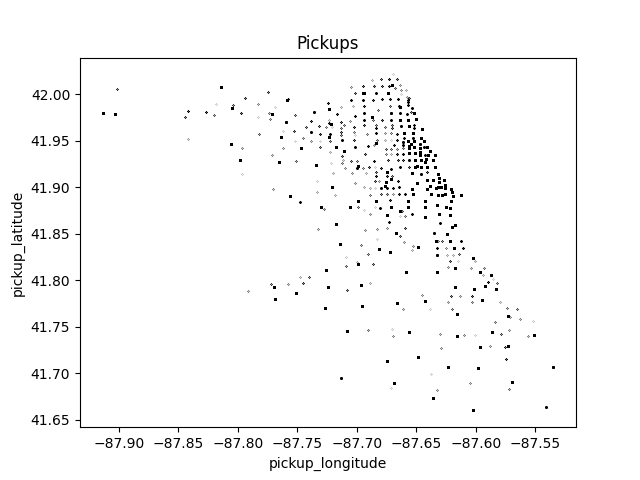

In [193]:
#taxi trip distribution across chicago
f, (ax1) = plt.subplots(1, sharey=True)

taxt_df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', 
                s=.02, alpha=0.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
#ax1.set_facecolor('black')
plt.show()

In [66]:
#Converting time to unix format
%%time

def convert_to_unix(s):
    s = str(s)
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.9 µs


In [109]:
taxt_df['pickup_times'] = taxt_df['pickup_datetime'].apply(convert_to_unix)

In [110]:
taxt_df.head(6)

,Trip_ID,pickup_datetime,dropoff_datetime,trip_distance,pickup_community_area,dropoff_community_area,pickup_longitude,pickup_latitude,pickup_centroid,dropoff_longitude,dropoff_latitude,dropoff_centroid,fare_amount,total_amount,trip_times,pickup_times
0,2445776f4b57f27ed1737b8187361ad4ed2aac66,2019-02-01,2019-02-01 00:30:00,11.58,76.0,NaN,-87.913625,41.980264,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,29.50,39.00,1461.0,1.548979e+09
3,1ea6684828115ef372baa4b637ff1c02eb93e618,2019-02-01,2019-02-01 00:15:00,0.10,32.0,33.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.620335,41.857184,POINT (-87.6203346241 41.8571838585),9.25,11.25,540.0,1.548979e+09
4,55c7fb49ee9dd3c2de6459d395a0195fc41db067,2019-02-01,2019-02-01 00:00:00,1.30,8.0,24.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.676356,41.901207,POINT (-87.6763559892 41.90120699410001),6.25,7.75,240.0,1.548979e+09
5,9a0ebfb03fc1d435dd6562c6819a76fd7d8d56bc,2019-02-01,2019-02-01 00:15:00,8.70,15.0,76.0,-87.763399,41.954028,POINT (-87.7633990316 41.9540276487),-87.913625,41.980264,POINT (-87.913624596 41.9802643146),24.75,24.75,1200.0,1.548979e+09
6,5b0e9f46e35b83e108c3cf4f9f4cf67a01700b51,2019-02-01,2019-02-01 00:00:00,0.00,32.0,32.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),3.25,3.25,0.0,1.548979e+09
7,5f562249d786bf1d0873737f52b788f77c6a3fff,2019-02-01,2019-02-01 00:30:00,18.20,76.0,NaN,-87.903040,41.979071,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN,44.25,84.75,1560.0,1.548979e+09


In [73]:
#adding 10 min pickup bins to the dataset
def add_pickup_bins(frame):
    unix_pickup_times=[i for i in frame['pickup_times'].values]    
    start_pickup_unix=1548979200 # 2019-02-01 00:00:00
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [111]:
taxt_df['pickup_times'].iloc[0]

1548979200.0

In [112]:
all_frame = add_pickup_bins(taxt_df)
all_groupby = all_frame[['pickup_community_area','pickup_bins','trip_distance']].groupby(['pickup_community_area','pickup_bins']).count()

In [113]:
all_frame

,Trip_ID,pickup_datetime,dropoff_datetime,trip_distance,pickup_community_area,dropoff_community_area,pickup_longitude,pickup_latitude,pickup_centroid,dropoff_longitude,dropoff_latitude,dropoff_centroid,fare_amount,total_amount,trip_times,pickup_times,pickup_bins
0,2445776f4b57f27ed1737b8187361ad4ed2aac66,2019-02-01,2019-02-01 00:30:00,11.58,76.0,NaN,-87.913625,41.980264,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,29.50,39.00,1461.0,1.548979e+09,0
3,1ea6684828115ef372baa4b637ff1c02eb93e618,2019-02-01,2019-02-01 00:15:00,0.10,32.0,33.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.620335,41.857184,POINT (-87.6203346241 41.8571838585),9.25,11.25,540.0,1.548979e+09,0
4,55c7fb49ee9dd3c2de6459d395a0195fc41db067,2019-02-01,2019-02-01 00:00:00,1.30,8.0,24.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.676356,41.901207,POINT (-87.6763559892 41.90120699410001),6.25,7.75,240.0,1.548979e+09,0
5,9a0ebfb03fc1d435dd6562c6819a76fd7d8d56bc,2019-02-01,2019-02-01 00:15:00,8.70,15.0,76.0,-87.763399,41.954028,POINT (-87.7633990316 41.9540276487),-87.913625,41.980264,POINT (-87.913624596 41.9802643146),24.75,24.75,1200.0,1.548979e+09,0
6,5b0e9f46e35b83e108c3cf4f9f4cf67a01700b51,2019-02-01,2019-02-01 00:00:00,0.00,32.0,32.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),3.25,3.25,0.0,1.548979e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287159,fc92effb5b3d6cf71e232cf35f2abe87bbc52d73,2019-05-01,2019-05-01 00:00:00,0.00,32.0,32.0,-87.632746,41.880994,POINT (-87.6327464887 41.8809944707),-87.632746,41.880994,POINT (-87.6327464887 41.8809944707),4.75,9.25,180.0,1.556665e+09,12810
4287160,fca3a341094f8f8caaf9bec0edd7f2d4fd9b466b,2019-05-01,2019-05-01 00:30:00,12.49,32.0,2.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.695013,42.001571,POINT (-87.6950125892 42.001571027),33.00,33.00,1702.0,1.556665e+09,12810
4287161,fd35511cfd62b959c29a8d8fb62b23d86b6177af,2019-05-01,2019-05-01 00:00:00,0.30,8.0,8.0,-87.631864,41.892042,POINT (-87.6318639497 41.8920421365),-87.629105,41.900221,POINT (-87.6291051864 41.9002212967),4.00,4.00,60.0,1.556665e+09,12810
4287162,ff083fb9be7aab87519efeb04fd5980227b9c1be,2019-05-01,2019-05-01 00:15:00,3.60,8.0,6.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.655998,41.944227,POINT (-87.6559981815 41.9442266014),11.50,11.50,480.0,1.556665e+09,12810


In [114]:
taxt_df['pickup_bins']

0              0
3              0
4              0
5              0
6              0
           ...  
4287159    12810
4287160    12810
4287161    12810
4287162    12810
4287163    12810
Name: pickup_bins, Length: 3896701, dtype: int64

In [116]:
taxt_df.count()

Trip_ID                   3896701
pickup_datetime           3896701
dropoff_datetime          3896601
trip_distance             3896559
pickup_community_area     3896701
dropoff_community_area    3694962
pickup_longitude          3896701
pickup_latitude           3896701
pickup_centroid           3896701
dropoff_longitude         3707886
dropoff_latitude          3707886
dropoff_centroid          3707886
fare_amount               3896326
total_amount              3896326
trip_times                3896178
pickup_times              3896701
pickup_bins               3896701
dtype: int64

adl={1:[1,2],2:[76,9,10,11,12],3:[4,13,14],4:[3,77],5:[15,17,19],6:[5,16,21],7:[20,22],
8:[7,6],
9:[25],
10:[23,26,27],
11:[24,28],
12:[8],
13:[32],
14:[29,30],
15:[60,59,31],
16:[33,35],
17:[56,64,],
18:[57,62,65,66,63,58],
19:[61,68,67],
20:[37,38,40],
21:[41,39,42],
22:[70],
23:[71,44],
24:[43,46,45],
25:[72,74,75],
26:[73,49,50],
27:[51,52],
28:[54,55]}


def find_var_new(to_find,adl):
  sp=''
  if(to_find==None or ''):
    return sp 
  for key,val in adl.items():
    while to_find in val:
      return(key)

count=0
found_list=[]
for e in taxt_df.pickup_community_area:
  a=find_var_new(e,adl)
  found_list.append(a)
  #print(e,a)
  #print(count,a)
  count+=1
#found_list
count

In [117]:
taxt_df

,Trip_ID,pickup_datetime,dropoff_datetime,trip_distance,pickup_community_area,dropoff_community_area,pickup_longitude,pickup_latitude,pickup_centroid,dropoff_longitude,dropoff_latitude,dropoff_centroid,fare_amount,total_amount,trip_times,pickup_times,pickup_bins
0,2445776f4b57f27ed1737b8187361ad4ed2aac66,2019-02-01,2019-02-01 00:30:00,11.58,76.0,NaN,-87.913625,41.980264,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,29.50,39.00,1461.0,1.548979e+09,0
3,1ea6684828115ef372baa4b637ff1c02eb93e618,2019-02-01,2019-02-01 00:15:00,0.10,32.0,33.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.620335,41.857184,POINT (-87.6203346241 41.8571838585),9.25,11.25,540.0,1.548979e+09,0
4,55c7fb49ee9dd3c2de6459d395a0195fc41db067,2019-02-01,2019-02-01 00:00:00,1.30,8.0,24.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.676356,41.901207,POINT (-87.6763559892 41.90120699410001),6.25,7.75,240.0,1.548979e+09,0
5,9a0ebfb03fc1d435dd6562c6819a76fd7d8d56bc,2019-02-01,2019-02-01 00:15:00,8.70,15.0,76.0,-87.763399,41.954028,POINT (-87.7633990316 41.9540276487),-87.913625,41.980264,POINT (-87.913624596 41.9802643146),24.75,24.75,1200.0,1.548979e+09,0
6,5b0e9f46e35b83e108c3cf4f9f4cf67a01700b51,2019-02-01,2019-02-01 00:00:00,0.00,32.0,32.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),3.25,3.25,0.0,1.548979e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287159,fc92effb5b3d6cf71e232cf35f2abe87bbc52d73,2019-05-01,2019-05-01 00:00:00,0.00,32.0,32.0,-87.632746,41.880994,POINT (-87.6327464887 41.8809944707),-87.632746,41.880994,POINT (-87.6327464887 41.8809944707),4.75,9.25,180.0,1.556665e+09,12810
4287160,fca3a341094f8f8caaf9bec0edd7f2d4fd9b466b,2019-05-01,2019-05-01 00:30:00,12.49,32.0,2.0,-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),-87.695013,42.001571,POINT (-87.6950125892 42.001571027),33.00,33.00,1702.0,1.556665e+09,12810
4287161,fd35511cfd62b959c29a8d8fb62b23d86b6177af,2019-05-01,2019-05-01 00:00:00,0.30,8.0,8.0,-87.631864,41.892042,POINT (-87.6318639497 41.8920421365),-87.629105,41.900221,POINT (-87.6291051864 41.9002212967),4.00,4.00,60.0,1.556665e+09,12810
4287162,ff083fb9be7aab87519efeb04fd5980227b9c1be,2019-05-01,2019-05-01 00:15:00,3.60,8.0,6.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.655998,41.944227,POINT (-87.6559981815 41.9442266014),11.50,11.50,480.0,1.556665e+09,12810


In [118]:
#labeling weekends as 1 and weekdays as 0
import datetime

def get_weekend(x):

    if x.weekday() > 4:
        return 1
    else:
        return 0

In [119]:
taxt_df['weekend'] = taxt_df['pickup_datetime'].apply(get_weekend)

In [120]:
taxt_df[['weekend','pickup_datetime']]

,weekend,pickup_datetime
0,0,2019-02-01
3,0,2019-02-01
4,0,2019-02-01
5,0,2019-02-01
6,0,2019-02-01
...,...,...
4287159,0,2019-05-01
4287160,0,2019-05-01
4287161,0,2019-05-01
4287162,0,2019-05-01


In [124]:
#Performing random verifications for weekends
taxt_df[taxt_df["pickup_datetime"]=='2019-04-26']

,Trip_ID,pickup_datetime,dropoff_datetime,trip_distance,pickup_community_area,dropoff_community_area,pickup_longitude,pickup_latitude,pickup_centroid,dropoff_longitude,dropoff_latitude,dropoff_centroid,fare_amount,total_amount,trip_times,pickup_times,pickup_bins,weekend
4061498,59758fab51eed1041aa3b8b672b69604fe7b84df,2019-04-26,2019-04-26 00:00:00,0.00,24.0,24.0,-87.676356,41.901207,POINT (-87.6763559892 41.90120699410001),-87.676356,41.901207,POINT (-87.6763559892 41.90120699410001),3.25,4.25,60.0,1.556233e+09,12090,0
4061505,3e419f5876aa67062c70ac21b5eb0b67814dd7a4,2019-04-26,2019-04-26 00:00:00,0.00,8.0,8.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.633308,41.899602,POINT (-87.6333080367 41.899602111),5.75,8.75,240.0,1.556233e+09,12090,0
4061508,5de4164d49d7d204c6193162b721b2f700288774,2019-04-26,2019-04-26 00:00:00,0.10,8.0,32.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.625192,41.878866,POINT (-87.6251921424 41.8788655841),9.00,12.65,600.0,1.556233e+09,12090,0
4061509,06fbfba63bf43a540bffeb6262bf8724878a8897,2019-04-26,2019-04-26 00:00:00,0.00,8.0,8.0,-87.628874,41.892073,POINT (-87.6288741572 41.8920726347),-87.628874,41.892073,POINT (-87.6288741572 41.8920726347),4.25,6.25,60.0,1.556233e+09,12090,0
4061510,58f73321a055ca537c4ce680be077aebee7c7a3c,2019-04-26,2019-04-26 00:00:00,0.00,8.0,8.0,-87.626215,41.892508,POINT (-87.6262149064 41.8925077809),-87.626215,41.892508,POINT (-87.6262149064 41.8925077809),4.75,9.25,180.0,1.556233e+09,12090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061851,e2a74f1ca9a00bb782ebd8097e901a9884fecc0f,2019-04-26,2019-04-26 00:00:00,0.71,77.0,4.0,-87.663416,41.986712,POINT (-87.6634164054 41.9867117999),-87.687516,41.975171,POINT (-87.68751551520002 41.9751709433),5.00,6.00,280.0,1.556233e+09,12090,0
4061852,920fb907def1c383d17ad011d297b7bfd9673736,2019-04-26,2019-04-26 00:15:00,9.37,56.0,33.0,-87.769615,41.792592,POINT (-87.7696154528 41.7925923603),-87.620335,41.857184,POINT (-87.6203346241 41.8571838585),24.75,37.81,928.0,1.556233e+09,12090,0
4061853,1a050c7b7298ac0085c6f6edbb46a27295eed1a7,2019-04-26,2019-04-26 00:00:00,1.00,7.0,7.0,-87.649489,41.922686,POINT (-87.6494887289 41.9226862843),-87.649489,41.922686,POINT (-87.6494887289 41.9226862843),5.25,9.75,180.0,1.556233e+09,12090,0
4061854,a3dfd0491a6679d9ae6cffa649ca33696a0c2514,2019-04-26,2019-04-26 00:15:00,5.50,8.0,22.0,-87.633308,41.899602,POINT (-87.6333080367 41.899602111),-87.699155,41.922761,POINT (-87.69915534320002 41.9227606205),16.75,16.75,979.0,1.556233e+09,12090,0


In [125]:
taxt_df.dtypes

Trip_ID                           object
pickup_datetime           datetime64[ns]
dropoff_datetime          datetime64[ns]
trip_distance                    float64
pickup_community_area            float64
dropoff_community_area           float64
pickup_longitude                 float64
pickup_latitude                  float64
pickup_centroid                   object
dropoff_longitude                float64
dropoff_latitude                 float64
dropoff_centroid                  object
fare_amount                      float64
total_amount                     float64
trip_times                       float64
pickup_times                     float64
pickup_bins                        int64
weekend                            int64
dtype: object

In [126]:
taxi_final=taxt_df.groupby(['pickup_community_area','pickup_bins']).agg({'dropoff_community_area': 'count', 'trip_times': 'mean', 'trip_distance':'mean','pickup_longitude':'mean',
                                                                         'pickup_latitude':'mean','weekend':'max','pickup_datetime':'max','pickup_bins':'max'})

In [127]:
taxi_final

dropoff_community_area  trip_times  \
pickup_community_area pickup_bins                                       
1.0                   0                                 1  753.000000   
                      1                                 1   58.000000   
                      3                                 1  588.000000   
                      4                                 4  463.250000   
                      6                                 0  772.000000   
...                                                   ...         ...   
77.0                  12802                             3  496.333333   
                      12805                             1  239.000000   
                      12807                             2  825.000000   
                      12808                             1  198.000000   
                      12810                             1  360.000000   

                                   trip_distance  pickup_longitude  \
pickup_community_area pickup_bins                                    
1.0                   0                 2.010000        -87.670167   
                      1                 0.005000        -87.670167   
                      3                 1.550000        -87.670167   
                      4                 1.567500        -87.670167   
                      6                 3.800000        -87.670167   
...                                          ...               ...   
77.0                  12802             0.953333        -87.663416   
                      12805             0.820000        -87.663416   
                      12807             1.880000        -87.663416   
                      12808             0.600000        -87.663416   
                      12810             1.200000        -87.663416   

                                   pickup_latitude  weekend  \
pickup_community_area pickup_bins                             
1.0                   0                  42.009623        0   
                      1                  42.009623        0   
                      3                  42.009623        0   
                      4                  42.009623        0   
                      6                  42.009623        0   
...                                            ...      ...   
77.0                  12802              41.986712        0   
                      12805              41.986712        0   
                      12807              41.986712        0   
                      12808              41.986712        0   
                      12810              41.986712        0   

                                      pickup_datetime  pickup_bins  
pickup_community_area pickup_bins                                   
1.0                   0           2019-02-01 00:00:00            0  
                      1           2019-02-01 00:15:00            1  
                      3           2019-02-01 00:30:00            3  
                      4           2019-02-01 00:45:00            4  
                      6           2019-02-01 01:00:00            6  
...                                               ...          ...  
77.0                  12802       2019-04-30 22:45:00        12802  
                      12805       2019-04-30 23:15:00        12805  
                      12807       2019-04-30 23:30:00        12807  
                      12808       2019-04-30 23:45:00        12808  
                      12810       2019-05-01 00:00:00        12810  

[212192 rows x 8 columns]

In [128]:
taxi_final[taxi_final['weekend']==1]

dropoff_community_area  trip_times  \
pickup_community_area pickup_bins                                       
1.0                   144                               2      233.00   
                      145                               1     1658.00   
                      147                               6      609.50   
                      148                               3      840.75   
                      150                               3      592.00   
...                                                   ...         ...   
77.0                  12513                             5      523.20   
                      12516                             2      288.00   
                      12517                             2      697.50   
                      12519                             4      742.25   
                      12520                             3      588.00   

                                   trip_distance  pickup_longitude  \
pickup_community_area pickup_bins                                    
1.0                   144                 0.6450        -87.670167   
                      145                 8.7400        -87.670167   
                      147                 1.8000        -87.671303   
                      148                 3.9250        -87.670167   
                      150                 2.9675        -87.672722   
...                                          ...               ...   
77.0                  12513               1.9640        -87.663416   
                      12516               0.8150        -87.663416   
                      12517               2.1000        -87.663416   
                      12519               5.1850        -87.663416   
                      12520               1.5800        -87.663416   

                                   pickup_latitude  weekend  \
pickup_community_area pickup_bins                             
1.0                   144                42.009623        1   
                      145                42.009623        1   
                      147                42.006981        1   
                      148                42.009623        1   
                      150                42.003679        1   
...                                            ...      ...   
77.0                  12513              41.986712        1   
                      12516              41.986712        1   
                      12517              41.986712        1   
                      12519              41.986712        1   
                      12520              41.986712        1   

                                      pickup_datetime  pickup_bins  
pickup_community_area pickup_bins                                   
1.0                   144         2019-02-02 00:00:00          144  
                      145         2019-02-02 00:15:00          145  
                      147         2019-02-02 00:30:00          147  
                      148         2019-02-02 00:45:00          148  
                      150         2019-02-02 01:00:00          150  
...                                               ...          ...  
77.0                  12513       2019-04-28 22:30:00        12513  
                      12516       2019-04-28 23:00:00        12516  
                      12517       2019-04-28 23:15:00        12517  
                      12519       2019-04-28 23:30:00        12519  
                      12520       2019-04-28 23:45:00        12520  

[59058 rows x 8 columns]

In [129]:
taxi_final.rename(columns={'dropoff_community_area': 'total_trips'}, inplace=True)

In [130]:
taxi_final.rename(columns={'pickup_bins': 'pickup_bins1'}, inplace=True)

In [131]:
taxi_final

total_trips  trip_times  trip_distance  \
pickup_community_area pickup_bins                                           
1.0                   0                      1  753.000000       2.010000   
                      1                      1   58.000000       0.005000   
                      3                      1  588.000000       1.550000   
                      4                      4  463.250000       1.567500   
                      6                      0  772.000000       3.800000   
...                                        ...         ...            ...   
77.0                  12802                  3  496.333333       0.953333   
                      12805                  1  239.000000       0.820000   
                      12807                  2  825.000000       1.880000   
                      12808                  1  198.000000       0.600000   
                      12810                  1  360.000000       1.200000   

                                   pickup_longitude  pickup_latitude  weekend  \
pickup_community_area pickup_bins                                               
1.0                   0                  -87.670167        42.009623        0   
                      1                  -87.670167        42.009623        0   
                      3                  -87.670167        42.009623        0   
                      4                  -87.670167        42.009623        0   
                      6                  -87.670167        42.009623        0   
...                                             ...              ...      ...   
77.0                  12802              -87.663416        41.986712        0   
                      12805              -87.663416        41.986712        0   
                      12807              -87.663416        41.986712        0   
                      12808              -87.663416        41.986712        0   
                      12810              -87.663416        41.986712        0   

                                      pickup_datetime  pickup_bins1  
pickup_community_area pickup_bins                                    
1.0                   0           2019-02-01 00:00:00             0  
                      1           2019-02-01 00:15:00             1  
                      3           2019-02-01 00:30:00             3  
                      4           2019-02-01 00:45:00             4  
                      6           2019-02-01 01:00:00             6  
...                                               ...           ...  
77.0                  12802       2019-04-30 22:45:00         12802  
                      12805       2019-04-30 23:15:00         12805  
                      12807       2019-04-30 23:30:00         12807  
                      12808       2019-04-30 23:45:00         12808  
                      12810       2019-05-01 00:00:00         12810  

[212192 rows x 8 columns]

<font size="5">Traffic Data Preprocessing</font>

In [23]:
inital_tf.rename(columns = {'pickup_community_area':'REGION_ID'}, inplace = True)

<font size="4">Loading chicago community area boundries dataset

In [10]:
gdf = gp.read_file('/Users/atif/Downloads/Boundaries - Community Areas (current)/geo_export_3a58f1ac-68d0-4110-a997-df131f6f6ef9.shp')
gdf

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


<font size="4">Loading Traffic Dataset

In [31]:

inital_traffic1 = pd.read_csv('traffic_segment_feb_apr_2019.csv')


In [32]:
inital_traffic1

,TIME,SEGMENT_ID,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,...,HOUR,DAY_OF_WEEK,MONTH,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION
0,02/01/2019 12:01:07 AM,138,25,Ashland,SB,67th,71st,0.50,S,NaN,...,0,6,2,0138-201902010601,41.772193,-87.664204,41.764910,-87.663979,POINT (-87.6642044154 41.7721930844),POINT (-87.6639792472 41.7649100967)
1,02/01/2019 12:01:07 AM,127,25,Ashland,NB,Addison,Irving Park,0.50,N,NaN,...,0,6,2,0127-201902010601,41.946989,-87.668674,41.954289,-87.668865,POINT (-87.6686743455 41.9469890515),POINT (-87.6688650541 41.9542892901)
2,02/01/2019 12:01:07 AM,134,24,Ashland,SB,87th,91st,0.50,S,NaN,...,0,6,2,0134-201902010601,41.735791,-87.663248,41.728483,-87.663035,POINT (-87.6632483146 41.7357908525),POINT (-87.6630347385 41.7284832358)
3,02/01/2019 12:01:07 AM,139,24,Ashland,SB,63rd,67th,0.50,S,NaN,...,0,6,2,0139-201902010601,41.779466,-87.664404,41.772193,-87.664204,POINT (-87.6644040713 41.7794656394),POINT (-87.6642044154 41.7721930844)
4,02/01/2019 12:01:07 AM,133,25,Ashland,SB,91st,95th,0.50,S,NaN,...,0,6,2,0133-201902010601,41.728483,-87.663035,41.721216,-87.662867,POINT (-87.6630347385 41.7284832358),POINT (-87.6628665545 41.7212162434)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851004,04/30/2019 11:50:35 PM,1214,19,Halsted,NB,Pershing,35th,0.50,S,NaN,...,23,3,4,1214-201905010450,41.823458,-87.645736,41.830750,-87.645915,POINT (-87.645736 41.823458),POINT (-87.645915 41.83075)
7851005,04/30/2019 11:50:35 PM,1183,18,Sheridan,NB,Devon,Pratt,0.52,N,NaN,...,23,3,4,1183-201905010450,41.998208,-87.660173,42.005539,-87.660736,POINT (-87.6601728465 41.9982075605),POINT (-87.6607357537 42.0055389804)
7851006,04/30/2019 11:50:35 PM,1263,22,Halsted,SB,Fullerton,Armitage,0.50,N,NaN,...,23,3,4,1263-201905010450,41.925454,-87.648950,41.918180,-87.648698,POINT (-87.64895 41.925454),POINT (-87.648698 41.91818)
7851007,04/30/2019 11:50:35 PM,1192,23,Dr Martin L King Jr,NB,24th,Cermak,0.25,S,NaN,...,23,3,4,1192-201905010450,41.849348,-87.618159,41.853001,-87.619411,POINT (-87.6181586591 41.8493482767),POINT (-87.619411 41.8530007099)


In [33]:
inital_traffic1['TIME'] = pd.to_datetime(inital_traffic1['TIME'], format = "%m/%d/%Y %I:%M:%S %p")

In [64]:
inital_traffic1['TIME'].min()

Timestamp('2019-02-01 00:01:07')

In [188]:
inital_traffic1['pickup_times'] = inital_traffic1['TIME'].apply(convert_to_unix)

In [38]:
inital_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,COMMENTS,BUS_COUNT,MESSAGE_COUNT,HOUR,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION,Calculated_Region
0,2019-02-01 00:01:07,138,25,0.50,NaN,1,6,0,0138-201902010601,41.772193,-87.664204,41.764910,-87.663979,POINT (-87.6642044154 41.7721930844),POINT (-87.6639792472 41.7649100967),0
1,2019-02-01 00:01:07,127,25,0.50,NaN,1,8,0,0127-201902010601,41.946989,-87.668674,41.954289,-87.668865,POINT (-87.6686743455 41.9469890515),POINT (-87.6688650541 41.9542892901),0
2,2019-02-01 00:01:07,134,24,0.50,NaN,2,7,0,0134-201902010601,41.735791,-87.663248,41.728483,-87.663035,POINT (-87.6632483146 41.7357908525),POINT (-87.6630347385 41.7284832358),0
3,2019-02-01 00:01:07,139,24,0.50,NaN,1,11,0,0139-201902010601,41.779466,-87.664404,41.772193,-87.664204,POINT (-87.6644040713 41.7794656394),POINT (-87.6642044154 41.7721930844),0
4,2019-02-01 00:01:07,133,25,0.50,NaN,3,24,0,0133-201902010601,41.728483,-87.663035,41.721216,-87.662867,POINT (-87.6630347385 41.7284832358),POINT (-87.6628665545 41.7212162434),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851004,2019-04-30 23:50:35,1214,19,0.50,NaN,1,10,23,1214-201905010450,41.823458,-87.645736,41.830750,-87.645915,POINT (-87.645736 41.823458),POINT (-87.645915 41.83075),0
7851005,2019-04-30 23:50:35,1183,18,0.52,NaN,1,10,23,1183-201905010450,41.998208,-87.660173,42.005539,-87.660736,POINT (-87.6601728465 41.9982075605),POINT (-87.6607357537 42.0055389804),0
7851006,2019-04-30 23:50:35,1263,22,0.50,NaN,2,16,23,1263-201905010450,41.925454,-87.648950,41.918180,-87.648698,POINT (-87.64895 41.925454),POINT (-87.648698 41.91818),0
7851007,2019-04-30 23:50:35,1192,23,0.25,NaN,1,3,23,1192-201905010450,41.849348,-87.618159,41.853001,-87.619411,POINT (-87.6181586591 41.8493482767),POINT (-87.619411 41.8530007099),0


In [40]:
#remove unused columns
inital_traffic1.drop(columns=['COMMENTS','START_LOCATION','END_LOCATION','HOUR'], inplace=True)

In [42]:
#calculate the mid points of longitude and latitude of traffic
inital_traffic1['Longitude_Mean']=(inital_traffic1['START_LONGITUDE']+inital_traffic1['END_LONGITUDE'])/2
inital_traffic1['Latitude_Mean']=(inital_traffic1['START_LATITUDE']+inital_traffic1['END_LATITUDE'])/2

In [44]:
#assigning zero to all Regions before computing the real values
inital_traffic1['Calculated_Region']=0
inital_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,Calculated_Region,Longitude_Mean,Latitude_Mean
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,41.772193,-87.664204,41.764910,-87.663979,0,-87.664092,41.768552
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,41.946989,-87.668674,41.954289,-87.668865,0,-87.668770,41.950639
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,41.735791,-87.663248,41.728483,-87.663035,0,-87.663142,41.732137
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,41.779466,-87.664404,41.772193,-87.664204,0,-87.664304,41.775829
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,41.728483,-87.663035,41.721216,-87.662867,0,-87.662951,41.724850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,41.823458,-87.645736,41.830750,-87.645915,0,-87.645826,41.827104
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,41.998208,-87.660173,42.005539,-87.660736,0,-87.660454,42.001873
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,41.925454,-87.648950,41.918180,-87.648698,0,-87.648824,41.921817
7851007,2019-04-30 23:50:35,1192,23,0.25,1,3,1192-201905010450,41.849348,-87.618159,41.853001,-87.619411,0,-87.618785,41.851174


In [46]:
gdf

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


<font size="4">Calculating the Community areas of traffic data using community area boundries dataset

In [47]:
for i in range(0,77):
    print(i)
    coords = gdf['geometry'].iloc[i]
    for j in range(0,7851008):
        p3=Point(inital_traffic1['Longitude_Mean'].iloc[j],inital_traffic1['Latitude_Mean'].iloc[j])
        x=p3.within(coords)
       
        if x is True:
           
            inital_traffic1['Calculated_Region'].iloc[j]= gdf['area_num_1'].iloc[i]  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


In [48]:
#Calculated_Region gives the community area for all these data points
inital_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,Calculated_Region,Longitude_Mean,Latitude_Mean
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,41.772193,-87.664204,41.764910,-87.663979,67,-87.664092,41.768552
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,41.946989,-87.668674,41.954289,-87.668865,6,-87.668770,41.950639
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,41.735791,-87.663248,41.728483,-87.663035,73,-87.663142,41.732137
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,41.779466,-87.664404,41.772193,-87.664204,67,-87.664304,41.775829
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,41.728483,-87.663035,41.721216,-87.662867,73,-87.662951,41.724850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,41.823458,-87.645736,41.830750,-87.645915,60,-87.645826,41.827104
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,41.998208,-87.660173,42.005539,-87.660736,1,-87.660454,42.001873
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,41.925454,-87.648950,41.918180,-87.648698,7,-87.648824,41.921817
7851007,2019-04-30 23:50:35,1192,23,0.25,1,3,1192-201905010450,41.849348,-87.618159,41.853001,-87.619411,33,-87.618785,41.851174


In [53]:
#Data points whose regions were outside chicago
inital_traffic1[(inital_traffic1['Calculated_Region']==0)].count()

TIME                 398416
SEGMENT_ID           398416
SPEED                398416
LENGTH               398416
BUS_COUNT            398416
MESSAGE_COUNT        398416
RECORD_ID            398416
START_LATITUDE       398416
START_LONGITUDE      398416
END_LATITUDE         398416
END_LONGITUDE        398416
Calculated_Region    398416
Longitude_Mean       398416
Latitude_Mean        398416
dtype: int64

In [54]:
#removing traffic datapoints outside chicago city
final_traffic1=inital_traffic1[~(inital_traffic1['Calculated_Region']==0)]

In [55]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,Calculated_Region,Longitude_Mean,Latitude_Mean
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,41.772193,-87.664204,41.764910,-87.663979,67,-87.664092,41.768552
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,41.946989,-87.668674,41.954289,-87.668865,6,-87.668770,41.950639
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,41.735791,-87.663248,41.728483,-87.663035,73,-87.663142,41.732137
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,41.779466,-87.664404,41.772193,-87.664204,67,-87.664304,41.775829
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,41.728483,-87.663035,41.721216,-87.662867,73,-87.662951,41.724850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,0.50,1,2,1219-201905010450,41.859912,-87.646517,41.867152,-87.646729,28,-87.646623,41.863532
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,41.823458,-87.645736,41.830750,-87.645915,60,-87.645826,41.827104
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,41.998208,-87.660173,42.005539,-87.660736,1,-87.660454,42.001873
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,41.925454,-87.648950,41.918180,-87.648698,7,-87.648824,41.921817


In [56]:
final_traffic1[(inital_traffic1['Calculated_Region']==0)]

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,Calculated_Region,Longitude_Mean,Latitude_Mean


In [58]:
final_traffic1['Calculated_Region'].unique()

array(['67', '6', '73', '71', '77', '61', '59', '22', '25', '28', '24',
       '40', '62', '7', '31', '8', '63', '23', '29', '65', '56', '26',
       '21', '70', '16', '13', '69', '30', '57', '49', '45', '20', '5',
       '72', '66', '4', '58', '33', '39', '36', '44', '2', '35', '32',
       '64', '3', '15', '17', '19', '50', '75', '60', '68', '18', '48',
       '43', '41', '11', '42', '51', '74', '14', '38', '34', '53', '54',
       '1', '47', '10', '52', '12', '27', '76', '9'], dtype=object)

In [59]:
final_traffic1.drop(columns=['START_LATITUDE','START_LONGITUDE','END_LATITUDE','END_LONGITUDE'], inplace=True)

In [60]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,Calculated_Region,Longitude_Mean,Latitude_Mean
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,67,-87.664092,41.768552
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,6,-87.668770,41.950639
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,73,-87.663142,41.732137
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,67,-87.664304,41.775829
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,73,-87.662951,41.724850
...,...,...,...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,0.50,1,2,1219-201905010450,28,-87.646623,41.863532
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,60,-87.645826,41.827104
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,1,-87.660454,42.001873
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,7,-87.648824,41.921817


In [61]:
#exporting traffic data with calculated community areas
final_traffic1.to_csv('Traffic_data_comm_area_feb_aprl_2019.csv', index = False)

In [224]:
all_frame_tf = add_pickup_bins(final_traffic1)
#all_groupby_tf = all_frame_tf[['traffic_region','pickup_bins','SPEED']].groupby(['traffic_region','pickup_bins']).count()

In [62]:
final_traffic1['pickup_community_area']=final_traffic1['Calculated_Region']

In [63]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,Calculated_Region,Longitude_Mean,Latitude_Mean,pickup_community_area
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,67,-87.664092,41.768552,67
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,6,-87.668770,41.950639,6
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,73,-87.663142,41.732137,73
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,67,-87.664304,41.775829,67
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,73,-87.662951,41.724850,73
...,...,...,...,...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,0.50,1,2,1219-201905010450,28,-87.646623,41.863532,28
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,60,-87.645826,41.827104,60
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,1,-87.660454,42.001873,1
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,7,-87.648824,41.921817,7


In [67]:
final_traffic1['pickup_times'] = final_traffic1['TIME'].apply(convert_to_unix)

In [69]:
final_traffic1['pickup_community_area']=final_traffic1['pickup_community_area'].astype('float64')
                                               

In [70]:
final_traffic1.dtypes

TIME                     datetime64[ns]
SEGMENT_ID                        int64
SPEED                             int64
LENGTH                          float64
BUS_COUNT                         int64
MESSAGE_COUNT                     int64
RECORD_ID                        object
Calculated_Region                object
Longitude_Mean                  float64
Latitude_Mean                   float64
pickup_community_area           float64
pickup_times                    float64
dtype: object

In [71]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,Calculated_Region,Longitude_Mean,Latitude_Mean,pickup_community_area,pickup_times
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,67,-87.664092,41.768552,67.0,1.548979e+09
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,6,-87.668770,41.950639,6.0,1.548979e+09
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,73,-87.663142,41.732137,73.0,1.548979e+09
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,67,-87.664304,41.775829,67.0,1.548979e+09
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,73,-87.662951,41.724850,73.0,1.548979e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,0.50,1,2,1219-201905010450,28,-87.646623,41.863532,28.0,1.556665e+09
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,60,-87.645826,41.827104,60.0,1.556665e+09
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,1,-87.660454,42.001873,1.0,1.556665e+09
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,7,-87.648824,41.921817,7.0,1.556665e+09


In [75]:
#Adding 10 minute pickup bins to traffic dataset
all_frame = add_pickup_bins(final_traffic1)
#all_groupby = all_frame[['pickup_community_area','pickup_bins','trip_distance']].groupby(['pickup_community_area','pickup_bins']).count()

In [76]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,RECORD_ID,Calculated_Region,Longitude_Mean,Latitude_Mean,pickup_community_area,pickup_times,pickup_bins
0,2019-02-01 00:01:07,138,25,0.50,1,6,0138-201902010601,67,-87.664092,41.768552,67.0,1.548979e+09,0
1,2019-02-01 00:01:07,127,25,0.50,1,8,0127-201902010601,6,-87.668770,41.950639,6.0,1.548979e+09,0
2,2019-02-01 00:01:07,134,24,0.50,2,7,0134-201902010601,73,-87.663142,41.732137,73.0,1.548979e+09,0
3,2019-02-01 00:01:07,139,24,0.50,1,11,0139-201902010601,67,-87.664304,41.775829,67.0,1.548979e+09,0
4,2019-02-01 00:01:07,133,25,0.50,3,24,0133-201902010601,73,-87.662951,41.724850,73.0,1.548979e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,0.50,1,2,1219-201905010450,28,-87.646623,41.863532,28.0,1.556665e+09,12809
7851004,2019-04-30 23:50:35,1214,19,0.50,1,10,1214-201905010450,60,-87.645826,41.827104,60.0,1.556665e+09,12809
7851005,2019-04-30 23:50:35,1183,18,0.52,1,10,1183-201905010450,1,-87.660454,42.001873,1.0,1.556665e+09,12809
7851006,2019-04-30 23:50:35,1263,22,0.50,2,16,1263-201905010450,7,-87.648824,41.921817,7.0,1.556665e+09,12809


In [78]:
#removing unused columns
final_traffic1.drop(columns=['pickup_times','LENGTH','BUS_COUNT','MESSAGE_COUNT','RECORD_ID'], axis=1, inplace=True)

In [81]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,Calculated_Region,Longitude_Mean,Latitude_Mean,pickup_community_area,pickup_bins
0,2019-02-01 00:01:07,138,25,67,-87.664092,41.768552,67.0,0
1,2019-02-01 00:01:07,127,25,6,-87.668770,41.950639,6.0,0
2,2019-02-01 00:01:07,134,24,73,-87.663142,41.732137,73.0,0
3,2019-02-01 00:01:07,139,24,67,-87.664304,41.775829,67.0,0
4,2019-02-01 00:01:07,133,25,73,-87.662951,41.724850,73.0,0
...,...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,28,-87.646623,41.863532,28.0,12809
7851004,2019-04-30 23:50:35,1214,19,60,-87.645826,41.827104,60.0,12809
7851005,2019-04-30 23:50:35,1183,18,1,-87.660454,42.001873,1.0,12809
7851006,2019-04-30 23:50:35,1263,22,7,-87.648824,41.921817,7.0,12809


In [53]:
#taxiTraficMerged=pd.merge(taxi_final,final_traffic)

In [86]:
final_traffic1.drop('Calculated_Region',axis=1, inplace = True)

In [87]:
final_traffic1

,TIME,SEGMENT_ID,SPEED,Longitude_Mean,Latitude_Mean,pickup_community_area,pickup_bins
0,2019-02-01 00:01:07,138,25,-87.664092,41.768552,67.0,0
1,2019-02-01 00:01:07,127,25,-87.668770,41.950639,6.0,0
2,2019-02-01 00:01:07,134,24,-87.663142,41.732137,73.0,0
3,2019-02-01 00:01:07,139,24,-87.664304,41.775829,67.0,0
4,2019-02-01 00:01:07,133,25,-87.662951,41.724850,73.0,0
...,...,...,...,...,...,...,...
7851003,2019-04-30 23:50:35,1219,25,-87.646623,41.863532,28.0,12809
7851004,2019-04-30 23:50:35,1214,19,-87.645826,41.827104,60.0,12809
7851005,2019-04-30 23:50:35,1183,18,-87.660454,42.001873,1.0,12809
7851006,2019-04-30 23:50:35,1263,22,-87.648824,41.921817,7.0,12809


In [88]:
#Grouping traffic dataset based on pickup bins and community area
final_traffic2=final_traffic1.groupby(['pickup_community_area','pickup_bins']).agg({'SPEED': 'mean','pickup_community_area':'max','pickup_bins':'max' })

In [89]:
final_traffic2.iloc[120000:120100]

SPEED  pickup_community_area  \
pickup_community_area pickup_bins                                     
13.0                  786          24.750000                   13.0   
                      787          26.285714                   13.0   
                      788          25.375000                   13.0   
                      789          24.142857                   13.0   
                      790          24.888889                   13.0   
...                                      ...                    ...   
                      905          26.125000                   13.0   
                      906          23.833333                   13.0   
                      907          24.800000                   13.0   
                      908          27.250000                   13.0   
                      910          26.833333                   13.0   

                                   pickup_bins  
pickup_community_area pickup_bins               
13.0                  786                  786  
                      787                  787  
                      788                  788  
                      789                  789  
                      790                  790  
...                                        ...  
                      905                  905  
                      906                  906  
                      907                  907  
                      908                  908  
                      910                  910  

[100 rows x 3 columns]

In [56]:
#taxiTraficMerged=pd.merge(left=taxt_df, right=inital_tf, how="inner", on=['pickup_bins','traffic_region'])

In [90]:
final_traffic2.rename(columns={'pickup_community_area': 'pickup_community_area1'}, inplace=True)
final_traffic2.rename(columns={'pickup_bins': 'pickup_bins1'}, inplace=True)

In [134]:
final_traffic2.count()

SPEED                     792319
pickup_community_area1    792319
pickup_bins1              792319
dtype: int64

In [132]:
taxi_final.count()

total_trips         212192
trip_times          212162
trip_distance       212190
pickup_longitude    212192
pickup_latitude     212192
weekend             212192
pickup_datetime     212192
pickup_bins1        212192
dtype: int64

In [59]:
#taxiTraficMerged

In [133]:
taxiTraficMerged=pd.DataFrame

<font size="4">Merging TAXI and TRAFFIC dataset</font>

In [135]:
taxiTraficMerged = taxi_final.merge(final_traffic2, on=['pickup_community_area','pickup_bins',], how='inner')

In [136]:
taxiTraficMerged

total_trips  trip_times  trip_distance  \
pickup_community_area pickup_bins                                           
1.0                   1                      1   58.000000       0.005000   
                      3                      1  588.000000       1.550000   
                      4                      4  463.250000       1.567500   
                      28                     4  405.000000       0.000000   
                      30                     2  300.000000       0.050000   
...                                        ...         ...            ...   
77.0                  12801                  3  285.333333       0.696667   
                      12802                  3  496.333333       0.953333   
                      12805                  1  239.000000       0.820000   
                      12807                  2  825.000000       1.880000   
                      12808                  1  198.000000       0.600000   

                                   pickup_longitude  pickup_latitude  weekend  \
pickup_community_area pickup_bins                                               
1.0                   1                  -87.670167        42.009623        0   
                      3                  -87.670167        42.009623        0   
                      4                  -87.670167        42.009623        0   
                      28                 -87.670167        42.009623        0   
                      30                 -87.670167        42.009623        0   
...                                             ...              ...      ...   
77.0                  12801              -87.663416        41.986712        0   
                      12802              -87.663416        41.986712        0   
                      12805              -87.663416        41.986712        0   
                      12807              -87.663416        41.986712        0   
                      12808              -87.663416        41.986712        0   

                                      pickup_datetime  pickup_bins1_x  SPEED  \
pickup_community_area pickup_bins                                              
1.0                   1           2019-02-01 00:15:00               1   25.5   
                      3           2019-02-01 00:30:00               3   25.0   
                      4           2019-02-01 00:45:00               4   18.0   
                      28          2019-02-01 04:45:00              28   24.0   
                      30          2019-02-01 05:00:00              30   25.0   
...                                               ...             ...    ...   
77.0                  12801       2019-04-30 22:30:00           12801   19.5   
                      12802       2019-04-30 22:45:00           12802   20.5   
                      12805       2019-04-30 23:15:00           12805   23.6   
                      12807       2019-04-30 23:30:00           12807   24.0   
                      12808       2019-04-30 23:45:00           12808   25.0   

                                   pickup_community_area1  pickup_bins1_y  
pickup_community_area pickup_bins                                          
1.0                   1                               1.0               1  
                      3                               1.0               3  
                      4                               1.0               4  
                      28                              1.0              28  
                      30                              1.0              30  
...                                                   ...             ...  
77.0                  12801                          77.0           12801  
                      12802                          77.0           12802  
                      12805                          77.0           12805  
                      12807                          77.0           12807  
                      1280

In [137]:
taxiTraficMerged.shape

(180019, 11)

In [138]:
taxiTraficMerged.shape

(180019, 11)

In [139]:
taxiTraficMerged

total_trips  trip_times  trip_distance  \
pickup_community_area pickup_bins                                           
1.0                   1                      1   58.000000       0.005000   
                      3                      1  588.000000       1.550000   
                      4                      4  463.250000       1.567500   
                      28                     4  405.000000       0.000000   
                      30                     2  300.000000       0.050000   
...                                        ...         ...            ...   
77.0                  12801                  3  285.333333       0.696667   
                      12802                  3  496.333333       0.953333   
                      12805                  1  239.000000       0.820000   
                      12807                  2  825.000000       1.880000   
                      12808                  1  198.000000       0.600000   

                                   pickup_longitude  pickup_latitude  weekend  \
pickup_community_area pickup_bins                                               
1.0                   1                  -87.670167        42.009623        0   
                      3                  -87.670167        42.009623        0   
                      4                  -87.670167        42.009623        0   
                      28                 -87.670167        42.009623        0   
                      30                 -87.670167        42.009623        0   
...                                             ...              ...      ...   
77.0                  12801              -87.663416        41.986712        0   
                      12802              -87.663416        41.986712        0   
                      12805              -87.663416        41.986712        0   
                      12807              -87.663416        41.986712        0   
                      12808              -87.663416        41.986712        0   

                                      pickup_datetime  pickup_bins1_x  SPEED  \
pickup_community_area pickup_bins                                              
1.0                   1           2019-02-01 00:15:00               1   25.5   
                      3           2019-02-01 00:30:00               3   25.0   
                      4           2019-02-01 00:45:00               4   18.0   
                      28          2019-02-01 04:45:00              28   24.0   
                      30          2019-02-01 05:00:00              30   25.0   
...                                               ...             ...    ...   
77.0                  12801       2019-04-30 22:30:00           12801   19.5   
                      12802       2019-04-30 22:45:00           12802   20.5   
                      12805       2019-04-30 23:15:00           12805   23.6   
                      12807       2019-04-30 23:30:00           12807   24.0   
                      12808       2019-04-30 23:45:00           12808   25.0   

                                   pickup_community_area1  pickup_bins1_y  
pickup_community_area pickup_bins                                          
1.0                   1                               1.0               1  
                      3                               1.0               3  
                      4                               1.0               4  
                      28                              1.0              28  
                      30                              1.0              30  
...                                                   ...             ...  
77.0                  12801                          77.0           12801  
                      12802                          77.0           12802  
                      12805                          77.0           12805  
                      12807                          77.0           12807  
                      1280

In [140]:
taxiTraficMerged['pickup_bins1_y']

pickup_community_area  pickup_bins
1.0                    1                  1
                       3                  3
                       4                  4
                       28                28
                       30                30
                                      ...  
77.0                   12801          12801
                       12802          12802
                       12805          12805
                       12807          12807
                       12808          12808
Name: pickup_bins1_y, Length: 180019, dtype: int64

In [299]:
taxiTraficMerged.head(4)

total_trips  trip_times  trip_distance  \
pickup_community_area pickup_bins                                           
1.0                   0                      7     413.750        1.23000   
                      4                     15     593.000        2.29000   
                      5                      8     599.375        3.40125   
                      6                      3    1095.500        5.99750   

                                   pickup_longitude  pickup_latitude  weekend  \
pickup_community_area pickup_bins                                               
1.0                   0                  -87.670167        42.009623        0   
                      4                  -87.670167        42.009623        0   
                      5                  -87.670167        42.009623        0   
                      6                  -87.670167        42.009623        0   

                                      pickup_datetime  pickup_bins1_x  \
pickup_community_area pickup_bins                                       
1.0                   0           2019-02-01 00:45:00               0   
                      4           2019-02-01 04:45:00               4   
                      5           2019-02-01 05:45:00               5   
                      6           2019-02-01 06:45:00               6   

                                       SPEED  BUS_COUNT  \
pickup_community_area pickup_bins                         
1.0                   0            22.000000   1.142857   
                      4            25.818182   1.000000   
                      5            25.920000   1.480000   
                      6            23.840000   1.680000   

                                   pickup_community_area1  pickup_bins1_y  
pickup_community_area pickup_bins                                          
1.0                   0                               1.0               0  
                      4                               1.0               4  
                      5                               1.0               5  
                      6                               1.0               6

<font size="4">Weather data</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
#loading weather data
df = pd.read_csv('weather_feb_apr_2019.csv',index_col = 1,parse_dates=True)
df.head()

,Station Name,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,,,,,,,,,,
2019-02-01 01:00:00,63rd Street Weather Station,-13.8,-14.3,81,0.0,0.0,17.2,70,112,2.4,3.3,1002.1,7,355,11.8,02/01/2019 1:00 AM,63rdStreetWeatherStation201902010100
2019-02-01 02:00:00,63rd Street Weather Station,-13.8,-14.3,80,0.0,0.0,17.2,0,107,2.9,3.3,1002.3,7,354,11.8,02/01/2019 2:00 AM,63rdStreetWeatherStation201902010200
2019-02-01 03:00:00,63rd Street Weather Station,-13.6,-14.1,81,0.0,0.1,17.3,70,99,2.3,3.1,1001.8,7,354,11.7,02/01/2019 3:00 AM,63rdStreetWeatherStation201902010300
2019-02-01 04:00:00,63rd Street Weather Station,-13.7,-14.2,80,0.0,0.2,17.5,70,106,3.1,3.8,1001.6,7,355,11.8,02/01/2019 4:00 AM,63rdStreetWeatherStation201902010400
2019-02-01 05:00:00,63rd Street Weather Station,-13.3,-13.8,80,0.0,0.0,17.5,0,109,2.8,3.4,1002.0,7,355,11.8,02/01/2019 5:00 AM,63rdStreetWeatherStation201902010500


In [7]:
df.count()

Station Name                   2051
Air Temperature                2051
Wet Bulb Temperature           2051
Humidity                       2051
Rain Intensity                 2051
Interval Rain                  2051
Total Rain                     2051
Precipitation Type             2051
Wind Direction                 2051
Wind Speed                     2051
Maximum Wind Speed             2051
Barometric Pressure            2051
Solar Radiation                2051
Heading                        2051
Battery Life                   2051
Measurement Timestamp Label    2051
Measurement ID                 2051
dtype: int64

<font size="3">Converting hourly weather data to 10 minute time blocks

In [9]:
data_df = df.resample('10T').mean()

In [12]:
data_df

In [5]:
data_df2= data_df.ffill(axis=0).head(14000)

In [25]:
# data_df = data_df.interpolate(method='linear')

In [14]:
df.tail(10)

,Station Name,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,,,,,,,,,,
2019-04-30 20:00:00,63rd Street Weather Station,8.6,8.3,96,0.0,0.0,1.9,60,115,3.8,5.4,996.4,4,355,11.9,04/30/2019 8:00 PM,63rdStreetWeatherStation201904302000
2019-04-30 21:00:00,63rd Street Weather Station,7.7,7.4,97,0.0,0.1,2.0,0,40,6.6,9.0,995.5,4,355,11.9,04/30/2019 9:00 PM,63rdStreetWeatherStation201904302100
2019-04-29 18:00:00,63rd Street Weather Station,9.8,9.0,90,0.0,0.0,7.1,0,144,0.5,0.8,995.9,32,354,11.9,04/29/2019 6:00 PM,63rdStreetWeatherStation201904291800
2019-04-29 23:00:00,63rd Street Weather Station,9.0,8.6,95,0.0,0.0,7.1,0,14,2.1,3.1,999.3,3,355,11.9,04/29/2019 11:00 PM,63rdStreetWeatherStation201904292300
2019-04-30 10:00:00,63rd Street Weather Station,5.2,5.0,97,0.0,0.8,10.6,0,35,4.8,5.9,1002.7,47,355,11.9,04/30/2019 10:00 AM,63rdStreetWeatherStation201904301000
2019-04-30 12:00:00,63rd Street Weather Station,5.6,5.4,98,6.6,4.7,19.5,60,62,6.9,8.1,1000.3,223,356,11.9,04/30/2019 12:00 PM,63rdStreetWeatherStation201904301200
2019-04-30 22:00:00,63rd Street Weather Station,7.7,7.4,97,0.0,0.1,2.0,0,40,6.6,9.0,995.5,4,355,11.8,04/30/2019 10:00 PM,63rdStreetWeatherStation201904302200
2019-04-30 00:00:00,63rd Street Weather Station,8.1,7.7,96,0.0,0.0,7.1,0,40,2.8,4.2,999.9,3,355,11.9,04/30/2019 12:00 AM,63rdStreetWeatherStation201904302400
2019-04-30 23:00:00,63rd Street Weather Station,7.0,6.8,98,0.0,2.7,2.7,0,41,6.6,10.4,994.7,4,355,11.9,04/30/2019 11:00 PM,63rdStreetWeatherStation201904302300


In [8]:
data_df2.count()

Air Temperature         12817
Wet Bulb Temperature    12817
Humidity                12817
Rain Intensity          12817
Interval Rain           12817
Total Rain              12817
Precipitation Type      12817
Wind Direction          12817
Wind Speed              12817
Maximum Wind Speed      12817
Barometric Pressure     12817
Solar Radiation         12817
Heading                 12817
Battery Life            12817
dtype: int64

In [15]:
#export weather data with 10 minute frames
data_df2.to_csv('Weather_feb_apr_10min.csv')

In [144]:
inital_weather = pd.read_csv('Weather_feb_apr_10min.csv')

In [145]:
inital_weather.head(4)

,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
0,2019-02-01 00:00:00,-14.6,-15.2,79.0,0.0,0.0,17.2,70.0,0.0,0.0,0.5,1002.8,7.0,354.0,11.8
1,2019-02-01 00:10:00,-14.6,-15.2,79.0,0.0,0.0,17.2,70.0,0.0,0.0,0.5,1002.8,7.0,354.0,11.8
2,2019-02-01 00:20:00,-14.6,-15.2,79.0,0.0,0.0,17.2,70.0,0.0,0.0,0.5,1002.8,7.0,354.0,11.8
3,2019-02-01 00:30:00,-14.6,-15.2,79.0,0.0,0.0,17.2,70.0,0.0,0.0,0.5,1002.8,7.0,354.0,11.8


In [146]:
inital_weather['Rain Intensity'].max()

42.6

In [147]:
inital_wt= inital_weather[['Measurement Timestamp','Air Temperature','Humidity','Rain Intensity','Total Rain','Wind Speed','Solar Radiation']]     

In [148]:
inital_wt.head(5)

,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Total Rain,Wind Speed,Solar Radiation
0,2019-02-01 00:00:00,-14.6,79.0,0.0,17.2,0.0,7.0
1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0
2,2019-02-01 00:20:00,-14.6,79.0,0.0,17.2,0.0,7.0
3,2019-02-01 00:30:00,-14.6,79.0,0.0,17.2,0.0,7.0
4,2019-02-01 00:40:00,-14.6,79.0,0.0,17.2,0.0,7.0


In [151]:
#inital_wt['Measurement Timestamp'] = pd.to_datetime(inital_wt['Measurement Timestamp'], format = "%m/%d/%Y %I:%M:%S %p")

In [152]:
inital_wt['Measurement Timestamp']

0        2019-02-01 00:00:00
1        2019-02-01 00:10:00
2        2019-02-01 00:20:00
3        2019-02-01 00:30:00
4        2019-02-01 00:40:00
                ...         
12812    2019-04-30 23:20:00
12813    2019-04-30 23:30:00
12814    2019-04-30 23:40:00
12815    2019-04-30 23:50:00
12816    2019-05-01 00:00:00
Name: Measurement Timestamp, Length: 12817, dtype: object

In [153]:
#convert time to unix format
inital_wt['pickup_times'] = inital_wt['Measurement Timestamp'].apply(convert_to_unix)

In [154]:
#add 10 minute pickup bins
all_frame_tf = add_pickup_bins(inital_wt)
#all_groupby_tf = all_frame_tf[['Measurement Timestamp','Air Temperature','Humidity','Total Rain','Wind Speed','pickup_bins']].groupby(['pickup_bins']).count()

In [155]:
all_frame_tf

,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Total Rain,Wind Speed,Solar Radiation,pickup_times,pickup_bins
0,2019-02-01 00:00:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548979e+09,0
1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09,1
2,2019-02-01 00:20:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09,2
3,2019-02-01 00:30:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548981e+09,3
4,2019-02-01 00:40:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548982e+09,4
...,...,...,...,...,...,...,...,...,...
12812,2019-04-30 23:20:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556663e+09,12806
12813,2019-04-30 23:30:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556663e+09,12807
12814,2019-04-30 23:40:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556664e+09,12808
12815,2019-04-30 23:50:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556665e+09,12809


In [156]:
inital_wt

,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Total Rain,Wind Speed,Solar Radiation,pickup_times,pickup_bins
0,2019-02-01 00:00:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548979e+09,0
1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09,1
2,2019-02-01 00:20:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09,2
3,2019-02-01 00:30:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548981e+09,3
4,2019-02-01 00:40:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548982e+09,4
...,...,...,...,...,...,...,...,...,...
12812,2019-04-30 23:20:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556663e+09,12806
12813,2019-04-30 23:30:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556663e+09,12807
12814,2019-04-30 23:40:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556664e+09,12808
12815,2019-04-30 23:50:00,7.0,98.0,0.0,2.7,6.6,4.0,1.556665e+09,12809


In [158]:
taxiTraficMerged.count()

total_trips               180019
trip_times                179996
trip_distance             180018
pickup_longitude          180019
pickup_latitude           180019
weekend                   180019
pickup_datetime           180019
pickup_bins1_x            180019
SPEED                     180019
pickup_community_area1    180019
pickup_bins1_y            180019
dtype: int64

<font size="4">MERGING WEATHER DATA TO TAXI AND TRAFFIC DATASET

In [159]:
taxiTraficWeatherMerged=pd.merge(taxiTraficMerged, inital_wt, how="inner", on='pickup_bins')

In [160]:
taxiTraficWeatherMerged

,pickup_bins,total_trips,trip_times,trip_distance,pickup_longitude,pickup_latitude,weekend,pickup_datetime,pickup_bins1_x,SPEED,pickup_community_area1,pickup_bins1_y,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Total Rain,Wind Speed,Solar Radiation,pickup_times
0,1,1,58.000000,0.005000,-87.670167,42.009623,0,2019-02-01 00:15:00,1,25.500000,1.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
1,1,2,304.500000,0.835000,-87.695013,42.001571,0,2019-02-01 00:15:00,1,31.000000,2.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
2,1,3,694.000000,0.286667,-87.655879,41.965812,0,2019-02-01 00:15:00,1,21.000000,3.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
3,1,1,840.000000,0.200000,-87.683835,41.947792,0,2019-02-01 00:15:00,1,23.000000,5.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
4,1,10,386.300000,1.183000,-87.654307,41.943613,0,2019-02-01 00:15:00,1,23.714286,6.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180094,4768,7,703.428571,2.902857,-87.625192,41.878866,0,2019-03-06 02:45:00,4768,17.000000,32.0,4768,2019-03-06 02:40:00,-10.3,64.0,0.0,13.0,3.4,6.0,1.551840e+09
180095,4768,1,0.000000,0.000000,-87.616134,41.763247,0,2019-03-06 02:45:00,4768,35.000000,69.0,4768,2019-03-06 02:40:00,-10.3,64.0,0.0,13.0,3.4,6.0,1.551840e+09
180096,6066,9,480.444444,2.655556,-87.627710,41.879575,0,2019-03-15 03:00:00,6066,27.000000,32.0,6066,2019-03-15 03:00:00,4.6,85.0,0.0,43.5,8.4,4.0,1.552619e+09
180097,6931,10,455.100000,2.320000,-87.625192,41.878866,0,2019-03-21 03:15:00,6931,25.000000,32.0,6931,2019-03-21 03:10:00,4.1,87.0,0.0,6.1,2.8,4.0,1.553138e+09


In [84]:
#taxiTraficWeatherMerged.to_csv('merged_data.csv', index=False)

In [161]:
taxiTraficWeatherMerged['pickup_bins'].max()

12808

In [88]:
#all_frame = add_pickup_bins(taxiTraficWeatherMerged)
#all_groupby_final = all_frame[['pickup_community_area','pickup_bins','fare_amount','pickup_datetime','SPEED']].groupby(['pickup_community_area','pickup_bins']).count()

In [89]:
#all_groupby_final1=taxiTraficWeatherMerged.groupby(['pickup_community_area','pickup_bins']).count()

In [90]:
#Final_Data=test_var.groupby(['pickup_community_area','pickup_bins']).agg({'dropoff_community_area': 'count', 'SPEED': 'mean', 'trip_distance':'mean','Air Temperature':'mean','Humidity':'mean','Total Rain':'mean','Wind Speed':'mean'})

In [91]:
#Final_Data.rename(columns={'dropoff_community_area': 'total_trips'}, inplace=True)

In [92]:
#Final_Data

In [93]:
#final_df = pd.DataFrame(final_list, columns = ['pickup_cluster', 'pickup_bins', 'rides','pickup_datetime','SPEED'])
#final_df.head()

In [94]:
#final_df

In [95]:
#all_groupby

In [164]:
taxiTraficWeatherMerged.count()

pickup_bins               180099
total_trips               180099
trip_times                180076
trip_distance             180098
pickup_longitude          180099
pickup_latitude           180099
weekend                   180099
pickup_datetime           180099
pickup_bins1_x            180099
SPEED                     180099
pickup_community_area1    180099
pickup_bins1_y            180099
Measurement Timestamp     180099
Air Temperature           180099
Humidity                  180099
Rain Intensity            180099
Total Rain                180099
Wind Speed                180099
Solar Radiation           180099
pickup_times              180099
dtype: int64

In [324]:
#Final Merged Dataset
taxiTraficMerged

total_trips   trip_times  trip_distance  \
pickup_community_area pickup_bins                                            
1.0                   0                      7   413.750000       1.230000   
                      4                     15   593.000000       2.290000   
                      5                      8   599.375000       3.401250   
                      6                      3  1095.500000       5.997500   
                      7                     10   788.833333       3.110000   
...                                        ...          ...            ...   
77.0                  2130                   9   827.888889       2.442222   
                      2131                   6   477.333333       0.616667   
                      2132                   7   837.285714       1.978571   
                      2133                  13   337.857143       0.704286   
                      2134                   4   521.750000       1.295000   

                                   pickup_longitude  pickup_latitude  weekend  \
pickup_community_area pickup_bins                                               
1.0                   0                  -87.670167        42.009623        0   
                      4                  -87.670167        42.009623        0   
                      5                  -87.670167        42.009623        0   
                      6                  -87.670167        42.009623        0   
                      7                  -87.670167        42.009623        0   
...                                             ...              ...      ...   
77.0                  2130               -87.663818        41.988430        0   
                      2131               -87.663416        41.986712        0   
                      2132               -87.663416        41.986712        0   
                      2133               -87.663416        41.986712        0   
                      2134               -87.663416        41.986712        0   

                                      pickup_datetime  pickup_bins1_x  \
pickup_community_area pickup_bins                                       
1.0                   0           2019-02-01 00:45:00               0   
                      4           2019-02-01 04:45:00               4   
                      5           2019-02-01 05:45:00               5   
                      6           2019-02-01 06:45:00               6   
                      7           2019-02-01 07:45:00               7   
...                                               ...             ...   
77.0                  2130        2019-04-30 19:45:00            2130   
                      2131        2019-04-30 20:45:00            2131   
                      2132        2019-04-30 21:45:00            2132   
                      2133        2019-04-30 22:45:00            2133   
                      2134        2019-04-30 23:45:00            2134   

                                       SPEED  BUS_COUNT  \
pickup_community_area pickup_bins                         
1.0                   0            22.000000   1.142857   
                      4            25.818182   1.000000   
                      5            25.920000   1.480000   
                      6            23.840000   1.680000   
                      7            22.814815   2.333333   
...                                      ...        ...   
77.0                  2130         22.275862   1.517241   
                      2131         23.636364   1.333333   
                      2132         23.676471   1.205882   
                      2133         22.736842   1.105263   
                      2134         22.100000   1.100000   

                                   pickup_community_area1  pickup_bins1_y  
pickup_community_area pickup_bins                                          
1.0                   0                               1.0               0  
                    

In [328]:
taxiTraficMerged["pickup_community_area1"] = taxiTraficMerged["pickup_community_area1"].astype("category")


In [295]:
taxiTraficMerged.dtypes

total_trips                        int64
trip_times                       float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
weekend                            int64
pickup_datetime           datetime64[ns]
pickup_bins1_x                     int64
SPEED                            float64
pickup_community_area1           float64
pickup_bins1_y                     int64
dtype: object

In [167]:
taxiTraficWeatherMerged.to_csv('Merged_data_feb_aprl_2019_10mins.csv', index = False)


In [310]:
taxiTraficWeatherMerged=taxiTraficWeatherMerged[taxiTraficWeatherMerged['trip_times'].notnull()]

In [311]:
taxiTraficWeatherMerged=taxiTraficWeatherMerged[taxiTraficWeatherMerged['trip_distance'].notnull()]

In [312]:
taxiTraficWeatherMerged['trip_distance']

0         0.005000
1         0.835000
2         0.286667
3         0.200000
4         1.183000
            ...   
180094    2.902857
180095    0.000000
180096    2.655556
180097    2.320000
180098    0.750000
Name: trip_distance, Length: 180075, dtype: float64

In [309]:
taxiTraficWeattaxiTraficWeatherMerged=taxiTraficWeatherMerged[taxiTraficWeatherMerged['trip_times'].notnull()]

taxiTraficWeatherMerged=taxiTraficWeatherMerged[taxiTraficWeatherMerged['trip_distance'].notnull()]

taxiTraficWeatherMerged['trip_distance']herMerged=pd.read_csv('Merged_data_feb_aprl_2019_10mins.csv')

<font size="4">Multicollinearity Test using Variance Inflation Factor

In [265]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = taxiTraficWeatherMerged[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [313]:
Print('Multicollinearity Test')
X = taxiTraficWeatherMerged[['pickup_bins','weekend','trip_times','trip_distance', 'Air Temperature','SPEED','Rain Intensity','Total Rain','Solar Radiation']]
    # the calculation of variance inflation requires a constant
X['intercept'] = 1
    
# create dataframe to store vif values
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif[vif['Variable']!='intercept']
print(vif)

          Variable       VIF
0      pickup_bins  1.802279
1          weekend  1.009514
2       trip_times  1.081827
3    trip_distance  1.085926
4  Air Temperature  1.649569
5            SPEED  1.007657
6   Rain Intensity  1.031477
7       Total Rain  1.152051
8  Solar Radiation  1.072599
